# **Cuaderno Python Colab: Simulaciones para Programación y Análisis de Datos en Python**

**Objetivo:** Explorar los fundamentos de Python y realizar manipulaciones de datos, exploración estadística, y optimización de tareas en un entorno de análisis de datos.

1. **Fundamentos de la Programación en Python**

## **Practicar**

In [2]:
# Extracción y Preparación de Datos en Python

# Paso 1: Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Paso 2: Cargar el conjunto de datos desde una URL
# URL del conjunto de datos: https://raw.githubusercontent.com/cfcantillana/intro_ciencia_datos/refs/heads/main/supermarket_sales.csv
url = "https://raw.githubusercontent.com/cfcantillana/intro_ciencia_datos/refs/heads/main/supermarket_sales.csv"
data = pd.read_csv(url, delimiter=",")

In [4]:
# Paso 3: Exploración básica de los datos
# Visualización inicial de los primeros registros y estructura general del dataset
print("Primeros 5 registros del dataset:")
# print(data.head())
data.head()

Primeros 5 registros del dataset:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
# Método 1: Usando rename()
data = data.rename(columns={'Invoice ID': 'ID factura', 'Branch': 'Sucursal', 'City': 'Ciudad', 'Customer type': 'Tipo de Cliente', 'Gender': 'Genero', 'Product line': 'Linea de producto', 'Unit price': 'Precio unitario', 'Quantity': 'Cantidad', 'Tax 5%': 'Impuesto', 'Total': 'Total', 'Date': 'Fecha', 'Time': 'Hora', 'Payment': 'Medio de Pago', 'cogs': 'Costo de bienes vendidos', 'gross margin percentage': 'Margen Bruto', 'gross income': 'Ingreso Bruto', 'Rating': 'Clasificacion'  })

In [12]:
# Imprimir el DataFrame con los nuevos nombres de columna
print(data)

      ID factura Sucursal     Ciudad Tipo de Cliente  Genero  \
0    750-67-8428        A     Yangon          Member  Female   
1    226-31-3081        C  Naypyitaw          Normal  Female   
2    631-41-3108        A     Yangon          Normal    Male   
3    123-19-1176        A     Yangon          Member    Male   
4    373-73-7910        A     Yangon          Normal    Male   
..           ...      ...        ...             ...     ...   
995  233-67-5758        C  Naypyitaw          Normal    Male   
996  303-96-2227        B   Mandalay          Normal  Female   
997  727-02-1313        A     Yangon          Member    Male   
998  347-56-2442        A     Yangon          Normal    Male   
999  849-09-3807        A     Yangon          Member  Female   

          Linea de producto  Precio unitario  Cantidad  Impuesto      Total  \
0         Health and beauty            74.69         7   26.1415   548.9715   
1    Electronic accessories            15.28         5    3.8200    80.22

In [50]:
# Visualización inicial de los primeros registros y estructura general del dataset
print("Primeros 5 registros del dataset:")
# print(data.head())
data.head()

Primeros 5 registros del dataset:


,ID factura,Sucursal,Ciudad,Tipo de Cliente,Genero,Linea de producto,Precio unitario,Cantidad,Impuesto,Total,...,Hora,Medio de Pago,Costo de bienes vendidos,Margen Bruto,Ingreso Bruto,Clasificacion,Mes,AM_PM,Fecha_Ordinal,Clasificacion_Tramos
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,PM,737064,8-10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,3,AM,737126,8-10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,PM,737121,4-8
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,PM,737086,8-10
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,AM,737098,4-8


In [13]:
# Limpieza de datos
size_before = data.shape
data = data.dropna()
size_after = data.shape
print(f'Tamaño antes: {size_before}, Tamaño después: {size_after}')

Tamaño antes: (1000, 17), Tamaño después: (1000, 17)


In [30]:
# Mostrar los tipos de datos de cada columna
print("Tipos de datos de las columnas del DataFrame 'df':")
for columna in data.columns:
    tipo_dato = data[columna].dtype
    print(f"- {columna}: {tipo_dato}")

Tipos de datos de las columnas del DataFrame 'df':
- ID factura: object
- Sucursal: object
- Ciudad: object
- Tipo de Cliente: object
- Genero: object
- Linea de producto: object
- Precio unitario: float64
- Cantidad: int64
- Impuesto: float64
- Total: float64
- Fecha: datetime64[ns]
- Hora: object
- Medio de Pago: object
- Costo de bienes vendidos: float64
- Margen Bruto: float64
- Ingreso Bruto: float64
- Clasificacion: float64
- Mes: int32
- AM_PM: object
- Fecha_Ordinal: int64


In [16]:
# Count unique values in each column
for column in data.columns:
    unique_count = data[column].nunique()
    print(f"Column '{column}': {unique_count} valores unicos")

Column 'ID factura': 1000 valores unicos
Column 'Sucursal': 3 valores unicos
Column 'Ciudad': 3 valores unicos
Column 'Tipo de Cliente': 2 valores unicos
Column 'Genero': 2 valores unicos
Column 'Linea de producto': 6 valores unicos
Column 'Precio unitario': 943 valores unicos
Column 'Cantidad': 10 valores unicos
Column 'Impuesto': 990 valores unicos
Column 'Total': 990 valores unicos
Column 'Fecha': 89 valores unicos
Column 'Hora': 506 valores unicos
Column 'Medio de Pago': 3 valores unicos
Column 'Costo de bienes vendidos': 990 valores unicos
Column 'Margen Bruto': 1 valores unicos
Column 'Ingreso Bruto': 990 valores unicos
Column 'Clasificacion': 61 valores unicos


In [18]:
# Calculate and display value counts of 'Branch'
Sucursal_counts = data['Sucursal'].value_counts()
print(Sucursal_counts)

Sucursal
A    340
B    332
C    328
Name: count, dtype: int64


In [19]:
# Calculate and display value counts for all columns
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value Counts for column '{column}':\n{value_counts}\n")

Value Counts for column 'ID factura':
ID factura
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

Value Counts for column 'Sucursal':
Sucursal
A    340
B    332
C    328
Name: count, dtype: int64

Value Counts for column 'Ciudad':
Ciudad
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Value Counts for column 'Tipo de Cliente':
Tipo de Cliente
Member    501
Normal    499
Name: count, dtype: int64

Value Counts for column 'Genero':
Genero
Female    501
Male      499
Name: count, dtype: int64

Value Counts for column 'Linea de producto':
Linea de producto
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value Counts for column '

In [21]:
# Conteo de meses
data['Mes'] = pd.to_datetime(data['Fecha']).dt.month  # Extrae el mes de la columna 'Date'
conteo_meses = data['Mes'].value_counts().sort_index()  # Cuenta la frecuencia de cada mes y ordena por índice (mes)

print("Conteo de meses:")
print(conteo_meses)

Conteo de meses:
Mes
1    352
2    303
3    345
Name: count, dtype: int64


In [22]:
# AM o PM
data['AM_PM'] = pd.to_datetime(data['Hora']).dt.strftime('%p')

# Display the DataFrame with the new 'AM_PM' column
print(data[['Hora', 'AM_PM']].head())  # Show first few rows for verification

    Hora AM_PM
0  13:08    PM
1  10:29    AM
2  13:23    PM
3  20:33    PM
4  10:37    AM


<ipython-input-22-8508f93bdbe7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['AM_PM'] = pd.to_datetime(data['Hora']).dt.strftime('%p')


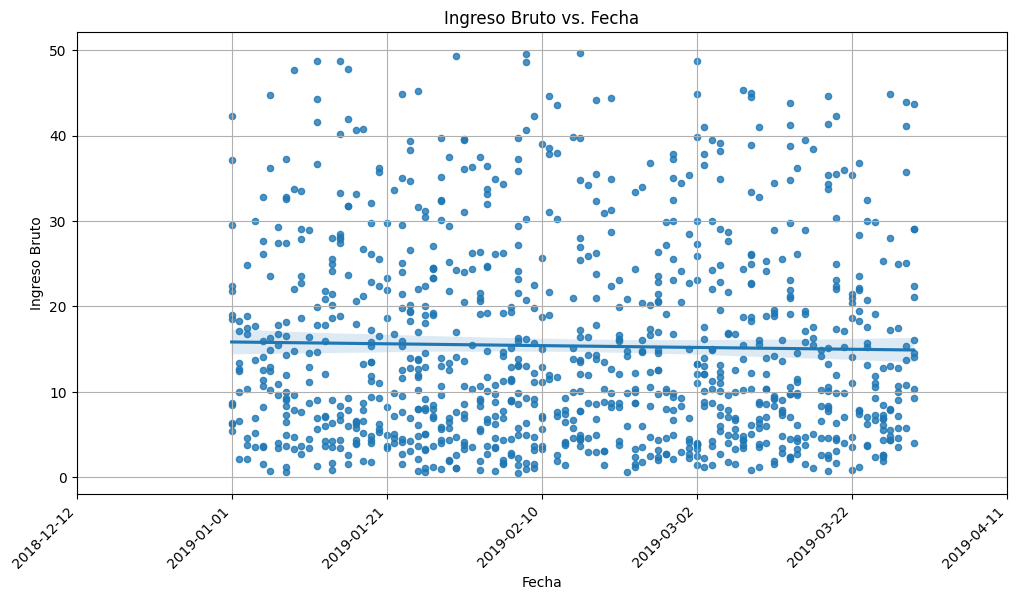

In [27]:
# Asegúrate de que 'Fecha' esté en formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Convierte la columna 'Fecha' a números ordinales para la regresión
data['Fecha_Ordinal'] = data['Fecha'].apply(lambda date: date.toordinal())

# Crea el gráfico de dispersión con línea de tendencia
plt.figure(figsize=(12, 6))
sns.regplot(x='Fecha_Ordinal', y='Ingreso Bruto', data=data, scatter_kws={'s': 20})  # Usa la nueva columna 'Fecha_Ordinal'
plt.title('Ingreso Bruto vs. Fecha')
plt.xlabel('Fecha')  # Mantén la etiqueta 'Fecha' para el eje x
plt.ylabel('Ingreso Bruto')
plt.grid(True)

# Formatea las etiquetas del eje x para mostrar las fechas originales
xticks = plt.xticks()[0]
xticklabels = [pd.Timestamp.fromordinal(int(xtick)).strftime('%Y-%m-%d') for xtick in xticks]
plt.xticks(xticks, xticklabels, rotation=45, ha='right')  # Ajusta la rotación y alineación según sea necesario

plt.show()

In [28]:
# Verificar valores nulos en todo el DataFrame
valores_nulos = data.isnull().sum()

# Imprimir el resultado
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
ID factura                  0
Sucursal                    0
Ciudad                      0
Tipo de Cliente             0
Genero                      0
Linea de producto           0
Precio unitario             0
Cantidad                    0
Impuesto                    0
Total                       0
Fecha                       0
Hora                        0
Medio de Pago               0
Costo de bienes vendidos    0
Margen Bruto                0
Ingreso Bruto               0
Clasificacion               0
Mes                         0
AM_PM                       0
Fecha_Ordinal               0
dtype: int64


In [29]:
# Mostrar los tipos de datos de cada columna
print("Tipos de datos de las columnas del DataFrame 'df':")
for columna in data.columns:
    tipo_dato = data[columna].dtype
    print(f"- {columna}: {tipo_dato}")

Tipos de datos de las columnas del DataFrame 'df':
- ID factura: object
- Sucursal: object
- Ciudad: object
- Tipo de Cliente: object
- Genero: object
- Linea de producto: object
- Precio unitario: float64
- Cantidad: int64
- Impuesto: float64
- Total: float64
- Fecha: datetime64[ns]
- Hora: object
- Medio de Pago: object
- Costo de bienes vendidos: float64
- Margen Bruto: float64
- Ingreso Bruto: float64
- Clasificacion: float64
- Mes: int32
- AM_PM: object
- Fecha_Ordinal: int64


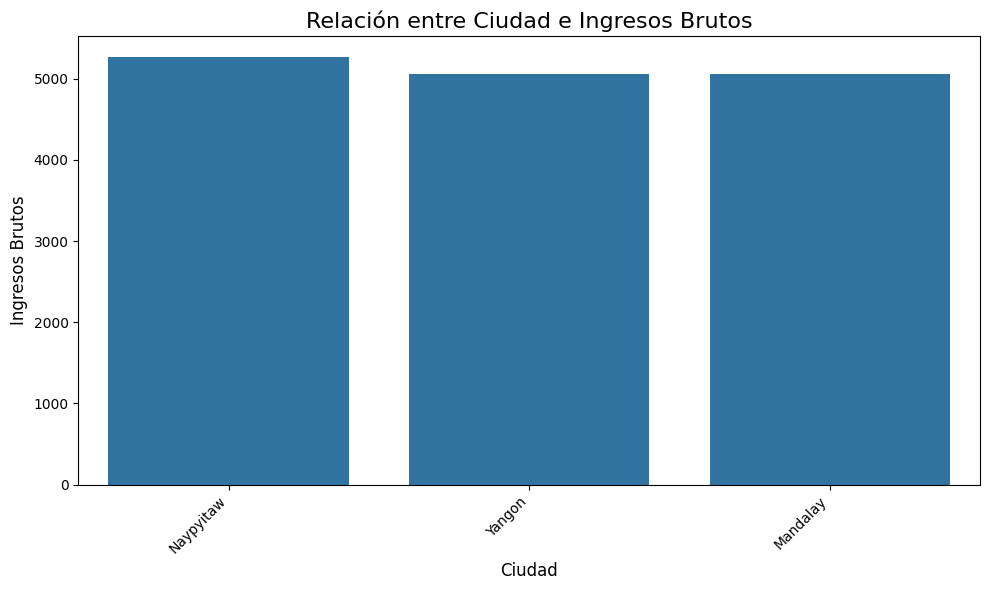

In [31]:
# --- Gráfico de barras para la relación entre Ciudad e Ingresos Brutos ---

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Agrupa los datos por ciudad y calcula la suma de ingresos brutos
ingresos_por_ciudad = data.groupby('Ciudad')['Ingreso Bruto'].sum().reset_index()

# Ordena las ciudades por ingresos brutos de mayor a menor
ingresos_por_ciudad = ingresos_por_ciudad.sort_values(by=['Ingreso Bruto'], ascending=False)

# Crea el gráfico de barras
sns.barplot(x='Ciudad', y='Ingreso Bruto', data=ingresos_por_ciudad)

# Configura las etiquetas y el título
plt.title('Relación entre Ciudad e Ingresos Brutos', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Ingresos Brutos', fontsize=12)

# Rota las etiquetas del eje x si son muy largas
plt.xticks(rotation=45, ha='right')

# Ajusta el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [37]:
# --- Crear columna con tramos de Clasificación ---

# Define los límites de los tramos y las etiquetas correspondientes
tramos = [0, 2, 4, 8, 10]  # Ajusta estos valores según tus necesidades
etiquetas = ['0-2', '2-4', '4-8', '8-10']  # Ajusta estas etiquetas según tus necesidades

# Crea la nueva columna 'Clasificación_Tramos' usando pd.cut()
data['Clasificacion_Tramos'] = pd.cut(data['Clasificacion'], bins=tramos, labels=etiquetas, include_lowest=True)

# --- Verificar la nueva columna ---
print(data[['Clasificacion', 'Clasificacion_Tramos']].head())

   Clasificacion Clasificacion_Tramos
0            9.1                 8-10
1            9.6                 8-10
2            7.4                  4-8
3            8.4                 8-10
4            5.3                  4-8


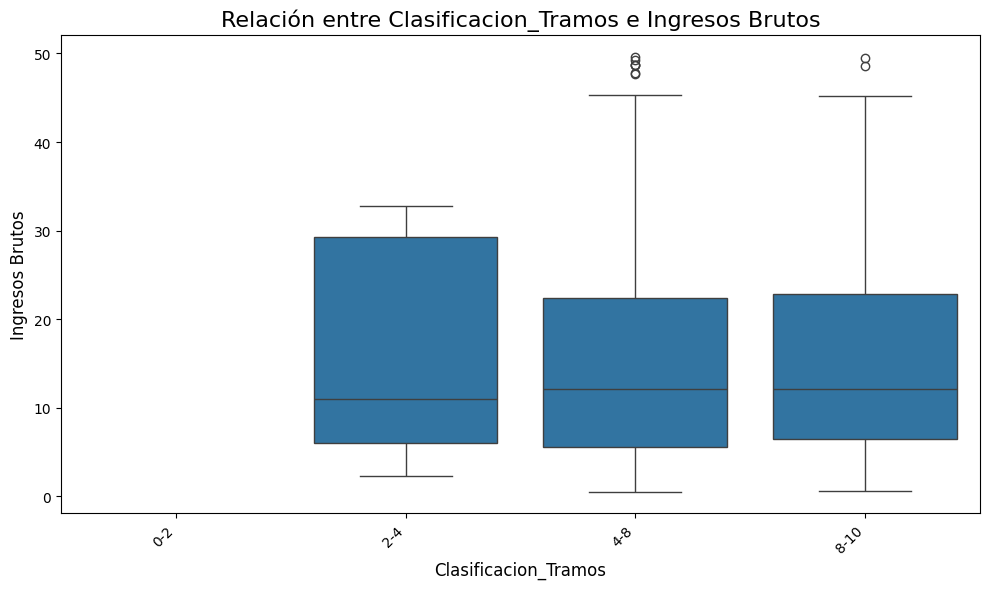

In [38]:
# --- Gráfico de caja para la relación entre Clasificación e Ingresos Brutos ---

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Crea el gráfico de caja
sns.boxplot(x='Clasificacion_Tramos', y='Ingreso Bruto', data=data)

# Configura las etiquetas y el título
plt.title('Relación entre Clasificacion_Tramos e Ingresos Brutos', fontsize=16)
plt.xlabel('Clasificacion_Tramos', fontsize=12)
plt.ylabel('Ingresos Brutos', fontsize=12)

# Rota las etiquetas del eje x si son muy largas
plt.xticks(rotation=45, ha='right')

# Ajusta el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

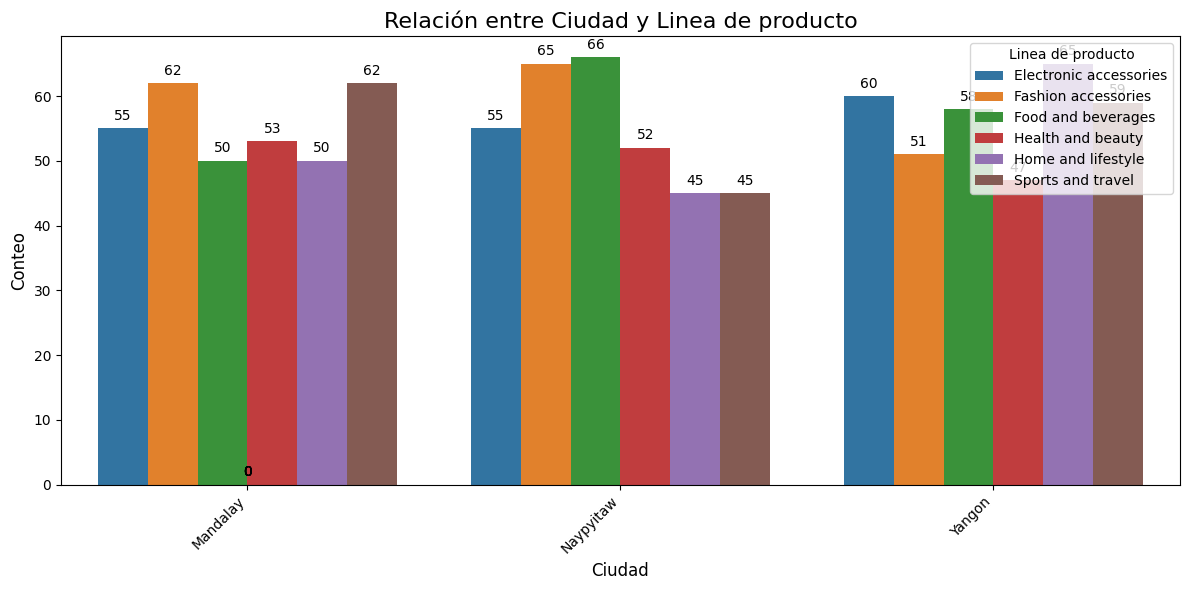

In [46]:
# --- Gráfico de barras con valores en las barras ---

plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario

# Crea una tabla cruzada para contar las combinaciones de Ciudad y Línea de Producto
tabla_cruzada = pd.crosstab(data['Ciudad'], data['Linea de producto'])

# Convierte la tabla cruzada a un formato largo para usar con seaborn
tabla_cruzada_larga = tabla_cruzada.stack().reset_index(name='Conteo')

# Crea el gráfico de barras agrupadas
ax = sns.barplot(x='Ciudad', y='Conteo', hue='Linea de producto', data=tabla_cruzada_larga)

# Agrega los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Configura las etiquetas y el título
plt.title('Relación entre Ciudad y Linea de producto', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rota las etiquetas del eje x si son muy largas
plt.xticks(rotation=45, ha='right')

# Ajusta el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

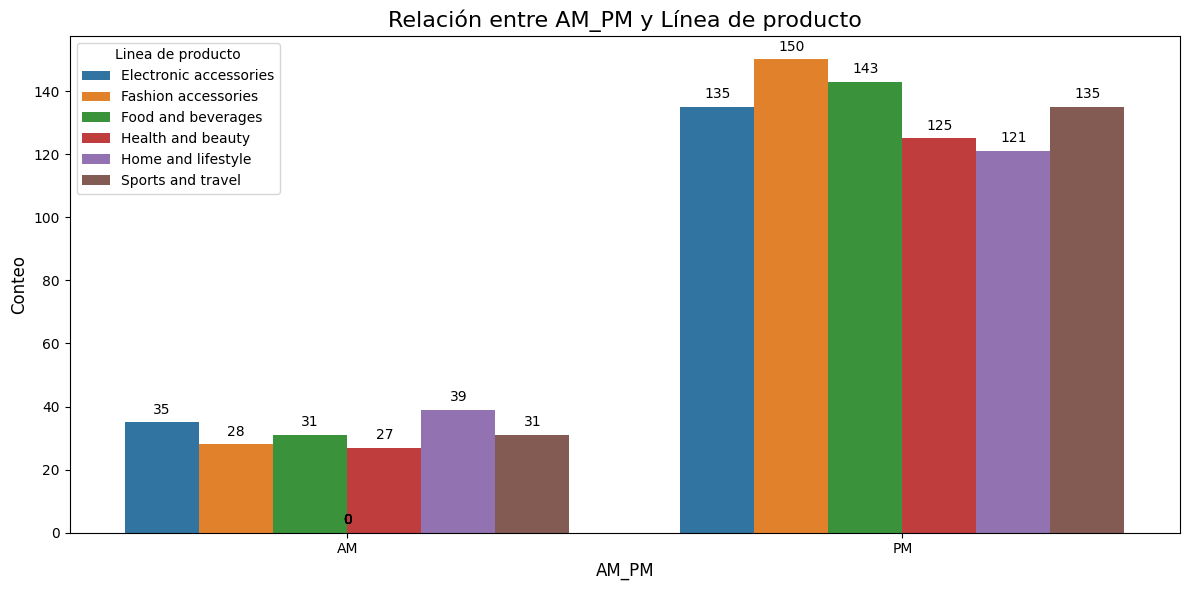

In [47]:
# --- Gráfico de barras entre AM_PM y Línea de Producto con valores en las barras ---

plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario

# Crea una tabla cruzada para contar las combinaciones de AM_PM y Línea de Producto
tabla_cruzada = pd.crosstab(data['AM_PM'], data['Linea de producto'])

# Convierte la tabla cruzada a un formato largo para usar con seaborn
tabla_cruzada_larga = tabla_cruzada.stack().reset_index(name='Conteo')

# Crea el gráfico de barras agrupadas
ax = sns.barplot(x='AM_PM', y='Conteo', hue='Linea de producto', data=tabla_cruzada_larga)

# Agrega los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Configura las etiquetas y el título
plt.title('Relación entre AM_PM y Línea de producto', fontsize=16)
plt.xlabel('AM_PM', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Ajusta el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

<ipython-input-48-6a5731461c45>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Linea de producto', y='Ingreso Bruto', data=data, estimator=sum, ci=None)


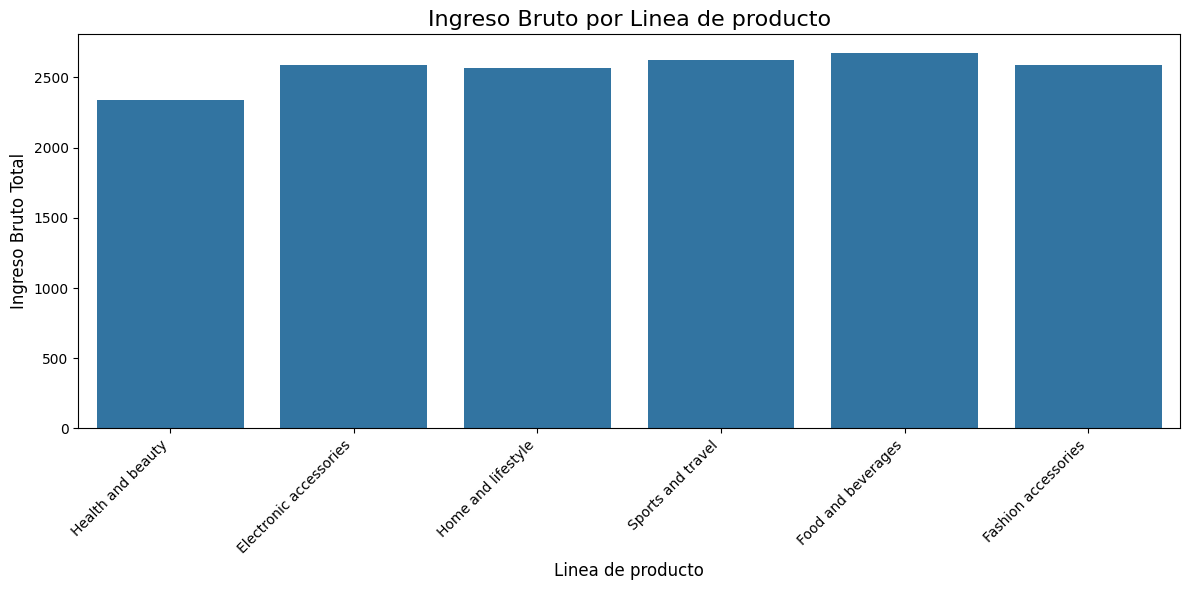

In [48]:
# --- Gráfico entre Línea de Producto e Ingreso Bruto ---

plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario

# Crea el gráfico de barras
sns.barplot(x='Linea de producto', y='Ingreso Bruto', data=data, estimator=sum, ci=None)
# estimator=sum para sumar los ingresos por línea de producto
# ci=None para eliminar las barras de error

# Configura las etiquetas y el título
plt.title('Ingreso Bruto por Linea de producto', fontsize=16)
plt.xlabel('Linea de producto', fontsize=12)
plt.ylabel('Ingreso Bruto Total', fontsize=12)

# Rota las etiquetas del eje x si son muy largas
plt.xticks(rotation=45, ha='right')

# Ajusta el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [59]:
# Suponiendo que 'data' es tu DataFrame
valores_nulos_por_columna = data.isnull().sum()

# Mostrar los resultados
print("Valores nulos por columna:")
print(valores_nulos_por_columna)

Valores nulos por columna:
ID factura                  0
Sucursal                    0
Ciudad                      0
Tipo de Cliente             0
Genero                      0
Linea de producto           0
Precio unitario             0
Cantidad                    0
Impuesto                    0
Total                       0
Fecha                       0
Hora                        0
Medio de Pago               0
Costo de bienes vendidos    0
Margen Bruto                0
Ingreso Bruto               0
Clasificacion               0
Mes                         0
AM_PM                       0
Fecha_Ordinal               0
Clasificacion_Tramos        0
dtype: int64


In [49]:
# --- Estadística descriptiva de las variables numéricas ---

# Selecciona solo las columnas numéricas
variables_numericas = data.select_dtypes(include=['number'])

# Calcula la estadística descriptiva
estadistica_descriptiva = variables_numericas.describe()

# Muestra la estadística descriptiva
print(estadistica_descriptiva)

       Precio unitario     Cantidad     Impuesto        Total  \
count      1000.000000  1000.000000  1000.000000  1000.000000   
mean         55.672130     5.510000    15.379369   322.966749   
std          26.494628     2.923431    11.708825   245.885335   
min          10.080000     1.000000     0.508500    10.678500   
25%          32.875000     3.000000     5.924875   124.422375   
50%          55.230000     5.000000    12.088000   253.848000   
75%          77.935000     8.000000    22.445250   471.350250   
max          99.960000    10.000000    49.650000  1042.650000   

       Costo de bienes vendidos  Margen Bruto  Ingreso Bruto  Clasificacion  \
count                1000.00000  1.000000e+03    1000.000000     1000.00000   
mean                  307.58738  4.761905e+00      15.379369        6.97270   
std                   234.17651  6.131498e-14      11.708825        1.71858   
min                    10.17000  4.761905e+00       0.508500        4.00000   
25%                

In [52]:
# --- Estadística descriptiva para todas las variables cualitativas ---

# Selecciona solo las columnas cualitativas (categóricas)
variables_cualitativas = data.select_dtypes(include=['object', 'category'])

# Calcula la estadística descriptiva para cada columna cualitativa
for columna in variables_cualitativas.columns:
    print(f"\n--- Estadística descriptiva para '{columna}' ---")
    print(data[columna].value_counts())  # Frecuencia de cada categoría
    print(f"Número de categorías únicas: {data[columna].nunique()}")  # Número de categorías únicas
    # Puedes agregar otras medidas descriptivas si lo necesitas (moda, etc.)


--- Estadística descriptiva para 'ID factura' ---
ID factura
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64
Número de categorías únicas: 1000

--- Estadística descriptiva para 'Sucursal' ---
Sucursal
A    340
B    332
C    328
Name: count, dtype: int64
Número de categorías únicas: 3

--- Estadística descriptiva para 'Ciudad' ---
Ciudad
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Número de categorías únicas: 3

--- Estadística descriptiva para 'Tipo de Cliente' ---
Tipo de Cliente
Member    501
Normal    499
Name: count, dtype: int64
Número de categorías únicas: 2

--- Estadística descriptiva para 'Genero' ---
Genero
Female    501
Male      499
Name: count, dtype: int64
Número de categorías únicas: 2

--- Estadística descriptiva para 'Linea de producto' ---
Linea de producto
F

In [53]:
import pandas as pd

# --- Estadística descriptiva para todas las variables cualitativas ---

# Selecciona solo las columnas cualitativas (categóricas)
variables_cualitativas = data.select_dtypes(include=['object', 'category'])

# Calcula la estadística descriptiva para cada columna cualitativa
for columna in variables_cualitativas.columns:
    print(f"\n--- Estadística descriptiva para '{columna}' ---")

    # Frecuencia de cada categoría
    frecuencias = data[columna].value_counts()
    print("Frecuencias:\n", frecuencias)

    # Porcentaje de cada categoría
    porcentajes = data[columna].value_counts(normalize=True) * 100
    print("\nPorcentajes:\n", porcentajes)

    # Número de categorías únicas
    print(f"\nNúmero de categorías únicas: {data[columna].nunique()}")

    # Moda (categoría más frecuente) - si es relevante
    print(f"Moda: {data[columna].mode()[0]}")


--- Estadística descriptiva para 'ID factura' ---
Frecuencias:
 ID factura
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

Porcentajes:
 ID factura
750-67-8428    0.1
642-61-4706    0.1
816-72-8853    0.1
491-38-3499    0.1
322-02-2271    0.1
              ... 
633-09-3463    0.1
374-17-3652    0.1
378-07-7001    0.1
433-75-6987    0.1
849-09-3807    0.1
Name: proportion, Length: 1000, dtype: float64

Número de categorías únicas: 1000
Moda: 101-17-6199

--- Estadística descriptiva para 'Sucursal' ---
Frecuencias:
 Sucursal
A    340
B    332
C    328
Name: count, dtype: int64

Porcentajes:
 Sucursal
A    34.0
B    33.2
C    32.8
Name: proportion, dtype: float64

Número de categorías únicas: 3
Moda: A

--- Estadística descriptiva para 'Ciudad' ---
Frecuencias:
 Ciudad
Yangon       340
Mandalay     332
Naypyita

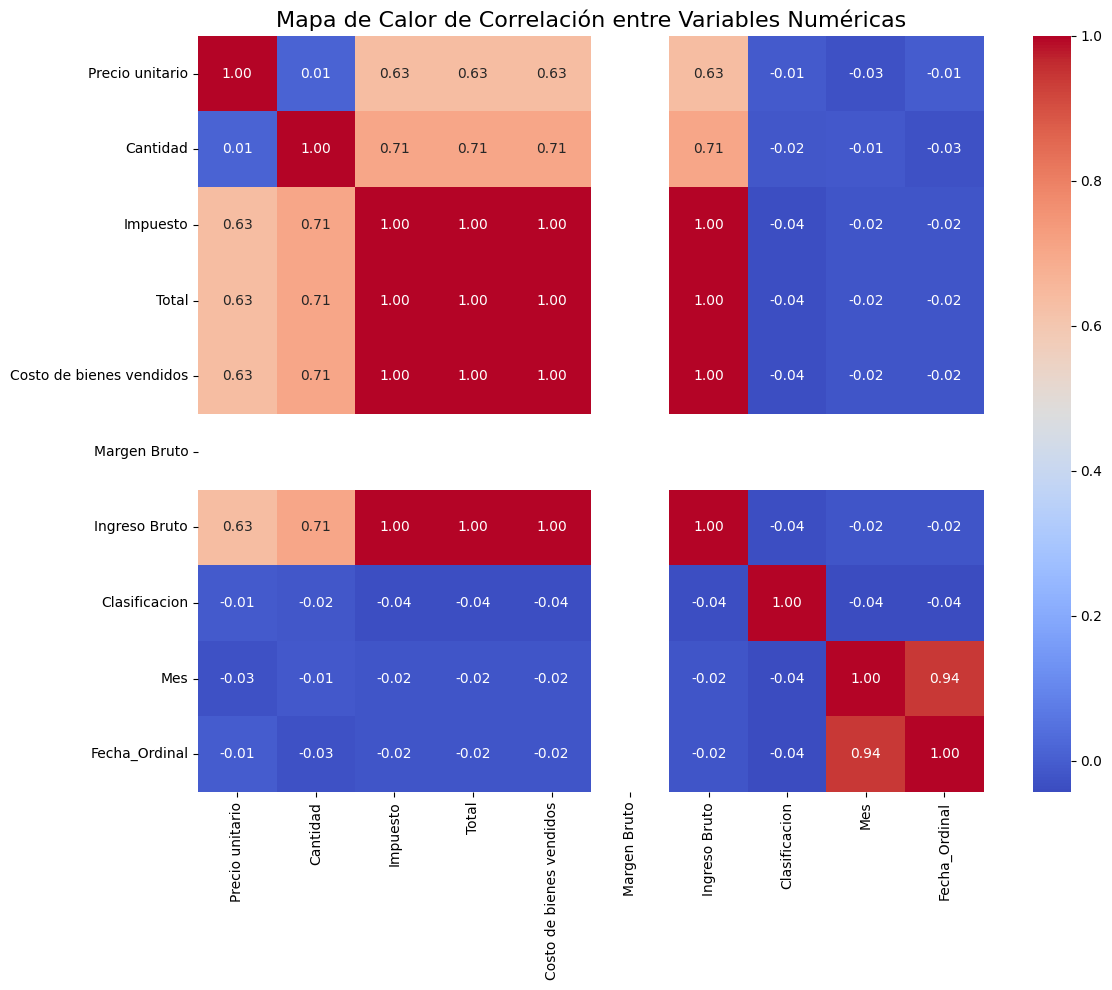

In [56]:
# --- Mapa de calor entre variables numéricas ---

# Selecciona solo las columnas numéricas
variables_numericas = data.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlacion = variables_numericas.corr()

# Crea el mapa de calor
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

In [62]:
import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:     Q('Ingreso Bruto')   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     989.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          2.06e-151
Time:                        14:53:40   Log-Likelihood:                -3534.5
No. Observations:                1000   AIC:                             7073.
Df Residuals:                     998   BIC:                             7083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1902      0.560     -0.339      0.7

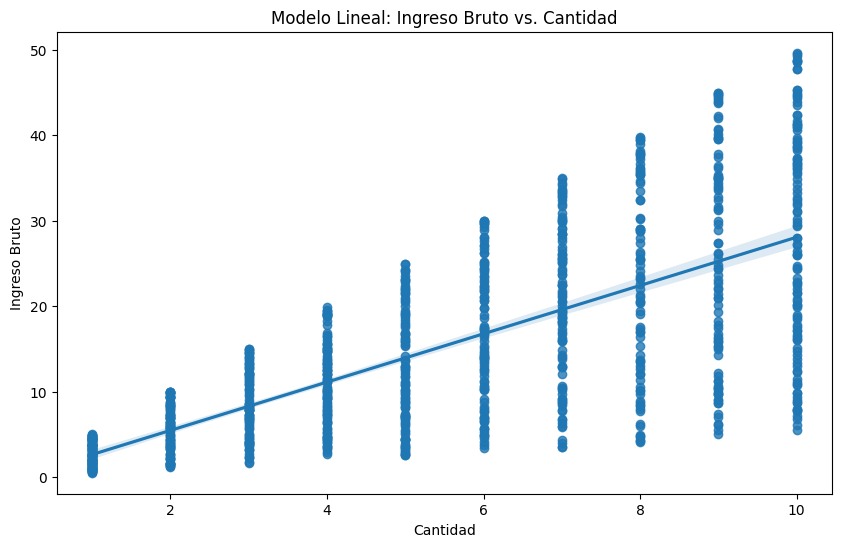

In [64]:
# Ajustar el modelo lineal
modelo = smf.ols("Q('Ingreso Bruto') ~ Cantidad", data=data).fit()

# Imprimir el resumen del modelo
print(modelo.summary())

# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x="Cantidad", y="Ingreso Bruto", data=data)
plt.title("Modelo Lineal: Ingreso Bruto vs. Cantidad")
plt.xlabel("Cantidad")
plt.ylabel("Ingreso Bruto")
plt.show()

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


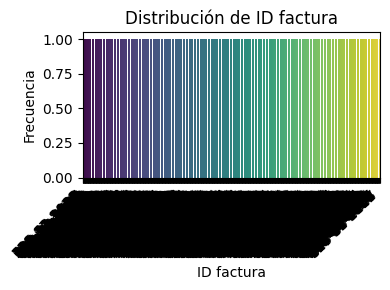

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


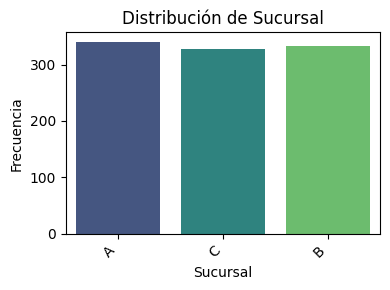

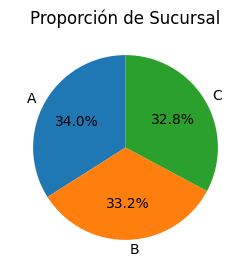

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


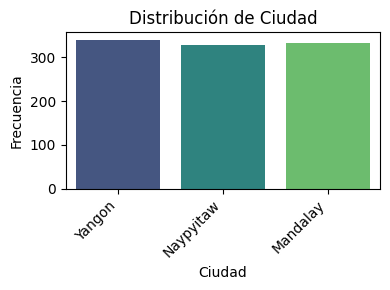

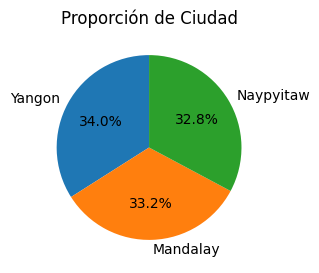

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


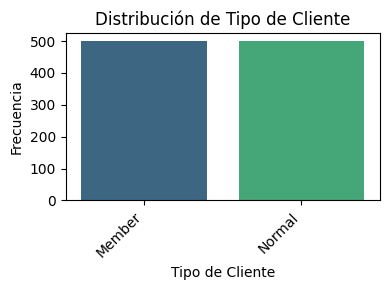

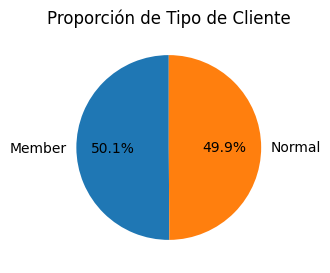

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


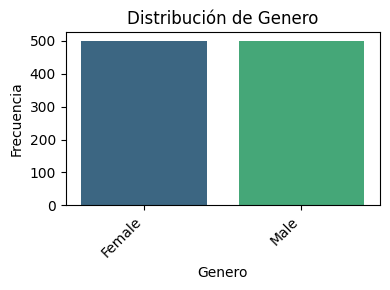

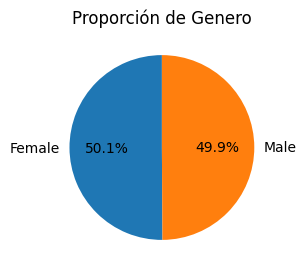

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


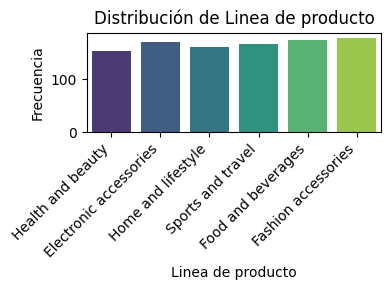

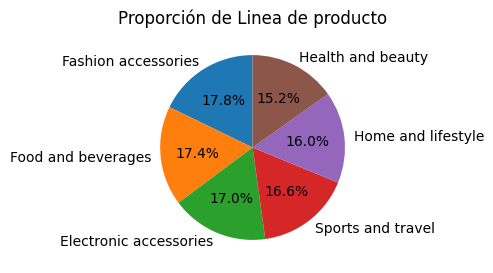

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


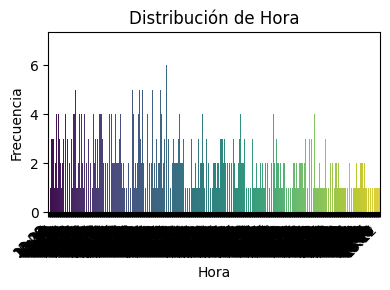

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


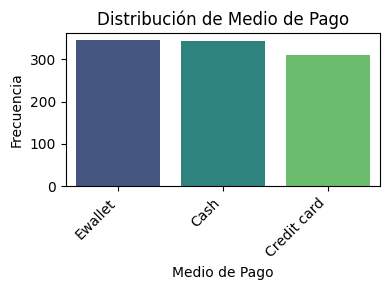

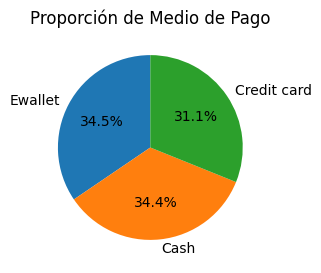

<ipython-input-58-29d36a44c3e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=data, palette='viridis')


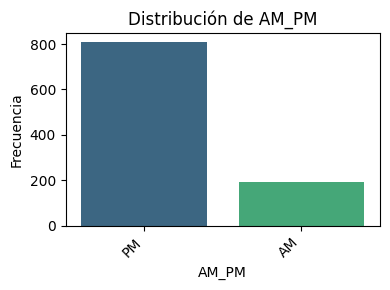

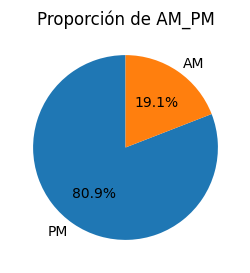

In [58]:
# Seleccionar las columnas de tipo 'object'
columnas_object = data.select_dtypes(include=['object']).columns

# Iterar sobre las columnas y generar los gráficos
for columna in columnas_object:
    # 1. Gráfico de barras (countplot) - pequeño
    plt.figure(figsize=(4, 3))  # Ajusta el tamaño (ancho, alto) según tus necesidades
    sns.countplot(x=columna, data=data, palette='viridis')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x si son largas
    plt.tight_layout()
    plt.show()

    # 2. Gráfico circular (pie chart) - pequeño (si hay pocas categorías)
    if data[columna].nunique() <= 6:  # Ajusta el número máximo de categorías si es necesario
        plt.figure(figsize=(3, 3))  # Ajusta el tamaño del gráfico circular
        data[columna].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Proporción de {columna}')
        plt.ylabel('')  # Quitar la etiqueta del eje y
        plt.show()

## **Titanic**

Estadistica descriptiva

In [ ]:
# Detectar valores nulos en el dataset
print("Valores nulos por columna:")
print(data.isnull().sum())

# 5. Decidir qué hacer con los valores nulos
# Eliminar columnas con demasiados nulos, en este caso 'deck' y 'embark_town'
data = data.drop(columns=['deck', 'embark_town'])

# 6. Llenar valores nulos en otras columnas, por ejemplo, 'age' con la mediana y 'embarked' con el valor más frecuente
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Verificar nuevamente valores nulos para confirmar que han sido tratados
print("Valores nulos después del tratamiento:")
print(data.isnull().sum())

Valores nulos por columna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Valores nulos después del tratamiento:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64


<ipython-input-20-c68ff9fa2b02>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-20-c68ff9fa2b02>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Convertir datos categóricos a tipo 'category' para optimizar espacio y facilitar análisis
data['survived'] = data['survived'].astype('object')
data['sex'] = data['sex'].astype('object')
data['class'] = data['class'].astype('object')
data['embarked'] = data['embarked'].astype('object')

# 8. Verificar tipos de datos después de la conversión
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    object 
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alive       891 non-null    object 
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 78.4+ KB


In [ ]:
# Convertir datos categóricos a tipo 'category' para optimizar espacio y facilitar análisis
data['survived'] = data['survived'].astype('object')
data['sex'] = data['sex'].astype('object')
data['class'] = data['class'].astype('object')
data['pclass'] = data['pclass'].astype('object')
data['embarked'] = data['embarked'].astype('object')

# Verificar tipos de datos después de la conversión
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    object 
 1   pclass      891 non-null    object 
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alive       891 non-null    object 
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(7)
memory usage: 78.4+ KB


In [ ]:
# Revisar estadísticas descriptivas para identificar posibles valores atípicos
print(data[['age', 'fare']].describe())

# 10. Identificar y tratar outliers en 'fare' usando el rango intercuartílico (IQR)
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores dentro de un rango aceptable
data = data[(data['fare'] >= (Q1 - 1.5 * IQR)) & (data['fare'] <= (Q3 + 1.5 * IQR))]

# Verificar el resultado
print("Distribución de la columna 'fare' después de eliminar outliers:")
print(data['fare'].describe())


              age        fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200
Distribución de la columna 'fare' después de eliminar outliers:
count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: fare, dtype: float64


In [ ]:
# Renombrar columnas para mayor claridad
data.rename(columns={'fare': 'ticket_fare', 'age': 'passenger_age'}, inplace=True)

# Crear una nueva columna, por ejemplo, si el pasajero es menor de edad (<18 años)
data['is_minor'] = data['passenger_age'] < 18

# Verificar el cambio de nombres y la nueva columna
print(data.head())


  survived pclass     sex  passenger_age  sibsp  parch  ticket_fare embarked  \
0        0      3    male           22.0      1      0       7.2500        S   
2        1      3  female           26.0      0      0       7.9250        S   
3        1      1  female           35.0      1      0      53.1000        S   
4        0      3    male           35.0      0      0       8.0500        S   
5        0      3    male           28.0      0      0       8.4583        Q   

   class    who  adult_male alive  alone  is_minor  
0  Third    man        True    no  False     False  
2  Third  woman       False   yes   True     False  
3  First  woman       False   yes  False     False  
4  Third    man        True    no   True     False  
5  Third    man        True    no   True     False  


In [ ]:
# Estadística descriptiva de las variables numéricas
print("\nEstadística descriptiva para variables numéricas:")
print(data.describe())


Estadística descriptiva para variables numéricas:
       passenger_age       sibsp       parch  ticket_fare
count     775.000000  775.000000  775.000000   775.000000
mean       28.748710    0.437419    0.340645    17.822091
std        12.782123    0.899838    0.785914    13.578085
min         0.420000    0.000000    0.000000     0.000000
25%        22.000000    0.000000    0.000000     7.895800
50%        28.000000    0.000000    0.000000    13.000000
75%        34.000000    1.000000    0.000000    26.000000
max        80.000000    5.000000    6.000000    65.000000


In [ ]:
# Realizar una revisión final del dataset
print("Dataset limpio:")
print(data.info())
print(data.head())

# Guardar el dataset limpio en un archivo CSV
data.to_csv('titanic_cleaned.csv', index=False)
print("Dataset limpio guardado como 'titanic_cleaned.csv'")

Dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       775 non-null    object 
 1   pclass         775 non-null    object 
 2   sex            775 non-null    object 
 3   passenger_age  775 non-null    float64
 4   sibsp          775 non-null    int64  
 5   parch          775 non-null    int64  
 6   ticket_fare    775 non-null    float64
 7   embarked       775 non-null    object 
 8   class          775 non-null    object 
 9   who            775 non-null    object 
 10  adult_male     775 non-null    bool   
 11  alive          775 non-null    object 
 12  alone          775 non-null    bool   
 13  is_minor       775 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(7)
memory usage: 74.9+ KB
None
  survived pclass     sex  passenger_age  sibsp  parch  ticket_fare embarked  \
0        0      3    ma

In [ ]:
# Estadística descriptiva de variables categóricas
print("\nEstadística descriptiva para variables categóricas:")
print(data.describe(include=['object']))


Estadística descriptiva para variables categóricas:
        survived  pclass   sex embarked  class  who alive
count        775     775   775      775    775  775   775
unique         2       3     2        3      3    3     2
top            0       3  male        S  Third  man    no
freq         512     484   531      584    484  494   512


In [ ]:
# Análisis de valores nulos en el dataset
print("\nConteo de valores nulos por columna:")
print(data.isnull().sum())


Conteo de valores nulos por columna:
survived         0
pclass           0
sex              0
passenger_age    0
sibsp            0
parch            0
ticket_fare      0
embarked         0
class            0
who              0
adult_male       0
alive            0
alone            0
is_minor         0
dtype: int64


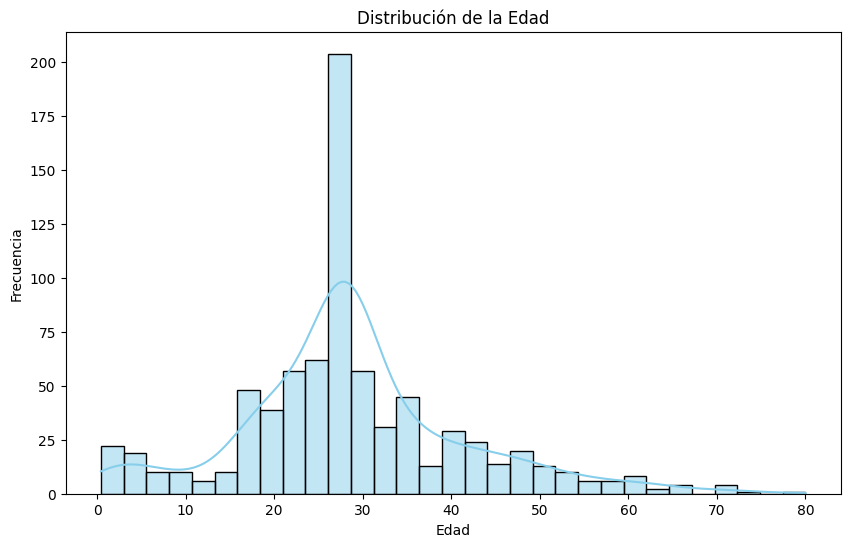

In [ ]:
# Visualización de la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data['passenger_age'].dropna(), kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-30-68f31ad497a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='ticket_fare', data=data, palette='pastel')


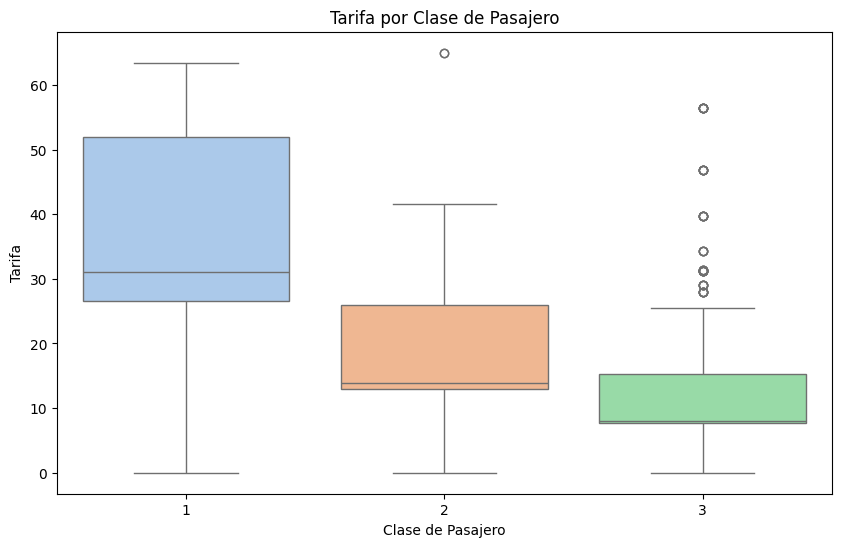

In [ ]:
# Boxplot de tarifas de pasajeros (fare) por clase (pclass)
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='ticket_fare', data=data, palette='pastel')
plt.title('Tarifa por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tarifa')
plt.show()

<ipython-input-31-8b4fdba0bab0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=data, palette='viridis')


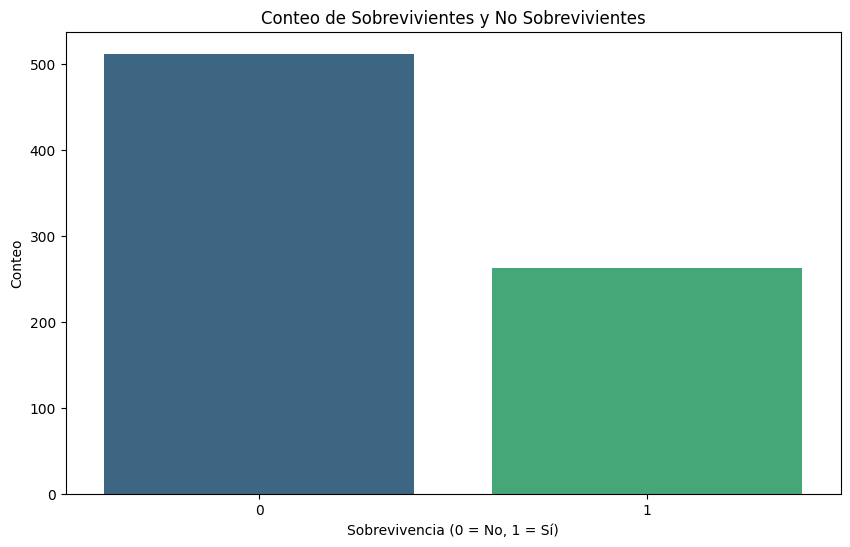

In [ ]:
# Conteo de sobrevivientes y no sobrevivientes
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=data, palette='viridis')
plt.title('Conteo de Sobrevivientes y No Sobrevivientes')
plt.xlabel('Sobrevivencia (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       775 non-null    object 
 1   pclass         775 non-null    object 
 2   sex            775 non-null    object 
 3   passenger_age  775 non-null    float64
 4   sibsp          775 non-null    int64  
 5   parch          775 non-null    int64  
 6   ticket_fare    775 non-null    float64
 7   embarked       775 non-null    object 
 8   class          775 non-null    object 
 9   who            775 non-null    object 
 10  adult_male     775 non-null    bool   
 11  alive          775 non-null    object 
 12  alone          775 non-null    bool   
 13  is_minor       775 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(7)
memory usage: 74.9+ KB


In [ ]:
numerical_data = data.select_dtypes(include=np.number)
numerical_data.head()

,passenger_age,sibsp,parch,ticket_fare
0,22.0,1,0,7.2500
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
5,28.0,0,0,8.4583


In [ ]:
# Análisis de correlaciones entre variables numéricas
correlation_matrix = numerical_data .corr()
print("\nMatriz de correlación de variables numéricas:")
print(correlation_matrix)


Matriz de correlación de variables numéricas:
               passenger_age     sibsp     parch  ticket_fare
passenger_age       1.000000 -0.335000 -0.204181     0.085716
sibsp              -0.335000  1.000000  0.410182     0.370388
parch              -0.204181  0.410182  1.000000     0.336844
ticket_fare         0.085716  0.370388  0.336844     1.000000


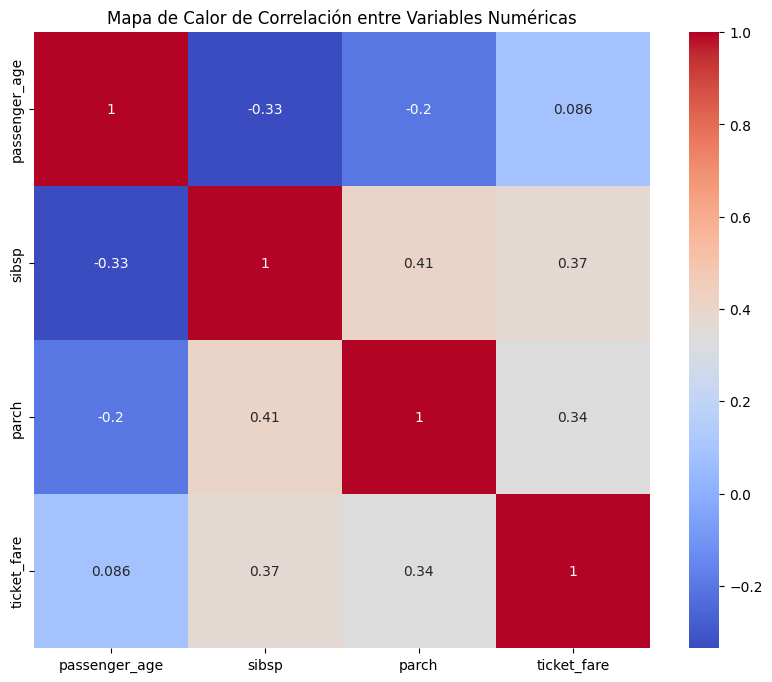

In [ ]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

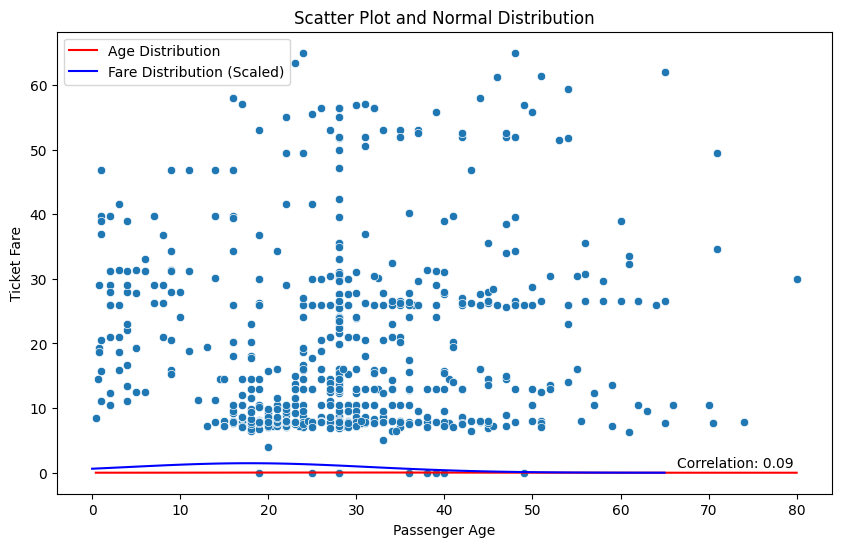

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'data' is your Titanic DataFrame

# 1. Select numerical features for correlation analysis
numerical_features = ['passenger_age', 'ticket_fare']
correlation_data = data[numerical_features]

# 2. Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# 3. Create a scatter plot with correlation values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_age', y='ticket_fare', data=data)
plt.title('Scatter Plot and Normal Distribution')

# Annotate with correlation value
correlation_value = correlation_matrix.loc['passenger_age', 'ticket_fare']
plt.text(0.95, 0.05, f'Correlation: {correlation_value:.2f}',
         transform=plt.gca().transAxes, ha='right', va='bottom')


# 4. Overlay normal distribution curves for each feature
# For 'passenger_age'
age_mean = data['passenger_age'].mean()
age_std = data['passenger_age'].std()
x_age = np.linspace(data['passenger_age'].min(), data['passenger_age'].max(), 100)
y_age = (1 / (age_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_age - age_mean) / age_std)**2)
plt.plot(x_age, y_age, color='red', label='Age Distribution')

# For 'ticket_fare'
fare_mean = data['ticket_fare'].mean()
fare_std = data['ticket_fare'].std()
x_fare = np.linspace(data['ticket_fare'].min(), data['ticket_fare'].max(), 100)
y_fare = (1 / (fare_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fare - fare_mean) / fare_std)**2)
# Scale the fare distribution to fit the scatter plot (adjust scale_factor as needed)
scale_factor = 50
plt.plot(x_fare, y_fare * scale_factor, color='blue', label='Fare Distribution (Scaled)')

plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
plt.legend()
plt.show()

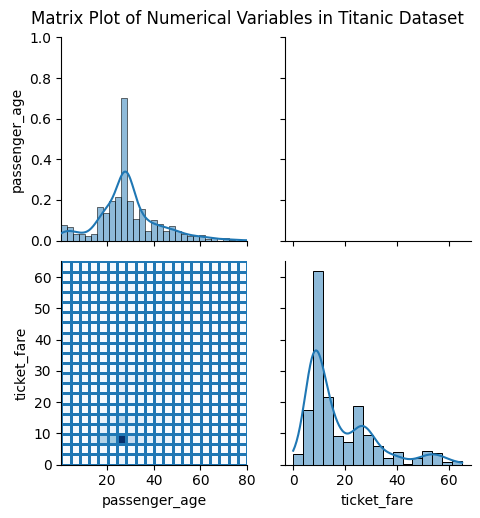

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your Titanic DataFrame
# Select numerical features for the matrix plot
numerical_features = ['passenger_age', 'ticket_fare']
data_for_matrix = data[numerical_features]

# Create the pair plot using seaborn's pairplot
grid = sns.PairGrid(data_for_matrix)

# Customize the diagonal with distribution plots (histograms/kde)
grid.map_diag(sns.histplot, kde=True)

# Customize the lower triangle with histograms
grid.map_lower(plt.hist2d, bins=20, cmap="Blues")

# Customize the upper triangle with correlation values
#grid.map_upper(sns.heatmap, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

plt.suptitle("Matrix Plot of Numerical Variables in Titanic Dataset", y=1.02)
plt.show()

## **Desarrollar análisis con Iris**

In [ ]:
# 4. Correlation matrix
print("\nCorrelation Matrix:")
print(iris_df.corr())


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.118129           0.873738   
sepal width (cm)           -0.118129          1.000000          -0.426028   
petal length (cm)           0.873738         -0.426028           1.000000   
petal width (cm)            0.820620         -0.362894           0.962772   
target                      0.786971         -0.422987           0.949402   

                   petal width (cm)    target  
sepal length (cm)          0.820620  0.786971  
sepal width (cm)          -0.362894 -0.422987  
petal length (cm)          0.962772  0.949402  
petal width (cm)           1.000000  0.956514  
target                     0.956514  1.000000  
